# ACTL3143/5111 Week 2 StoryWall Notebook

This notebook downloads and lightly preprocesses a dataset for your to perform regression on.

In [12]:
import pandas as pd
from sklearn.datasets import fetch_openml

# Download the dataset if it hasn't already been downloaded.
from pathlib import Path
cd = Path(".")
if (cd / "freq_data.csv").exists():
    freq = pd.read_csv("freq_data.csv")
else:
    print("Downloading dataset...")
    from sklearn.datasets import fetch_openml
    freq = fetch_openml(data_id=41214, as_frame=True).frame
    freq.to_csv("freq_data.csv", index=False)

# Remove the column named 'IDpol'.
freq = freq.drop("IDpol", axis=1)

# Convert categorical variables to numeric.
freq = pd.get_dummies(freq, columns=["VehGas", "Area", "VehBrand", "Region"])

freq

,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,VehGas_Diesel,VehGas_Regular,Area_A,...,Region_R53,Region_R54,Region_R72,Region_R73,Region_R74,Region_R82,Region_R83,Region_R91,Region_R93,Region_R94
0,1.0,0.10000,5.0,0.0,55.0,50.0,1217.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,1.0,0.77000,5.0,0.0,55.0,50.0,1217.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,1.0,0.75000,6.0,2.0,52.0,50.0,54.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0.09000,7.0,0.0,46.0,50.0,76.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1.0,0.84000,7.0,0.0,46.0,50.0,76.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678008,0.0,0.00274,4.0,0.0,54.0,50.0,3317.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
678009,0.0,0.00274,4.0,0.0,41.0,95.0,9850.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
678010,0.0,0.00274,6.0,2.0,45.0,50.0,1323.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
678011,0.0,0.00274,4.0,0.0,60.0,50.0,95.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


**TODO**: Fit a neural network to predict "ClaimNb" using some or all of the other inputs.

To make our fits comparable, split the data into training and test sets using sklearn's `train_test_split` function using a `random_state=2022`.

When compiling the model, use the "poisson" loss function.

Install Packages

In [13]:
%pip install -U scikit-learn pandas matplotlib seaborn tensorflow numpy 

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\kchu1\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [14]:
%pip install -U collections

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections
You should consider upgrading via the 'c:\Users\kchu1\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Prepare data

In [37]:
#separate features and target
target = freq['ClaimNb']
features = freq.drop(['ClaimNb'], axis=1)

In [38]:
#number of features and samples
NUM_FEATURES = features.shape[1]
features.shape

(678013, 47)

In [39]:
from collections import Counter
x = Counter(target)
x.most_common()

[(0.0, 643953),
 (1.0, 32178),
 (2.0, 1784),
 (3.0, 82),
 (4.0, 7),
 (11.0, 3),
 (5.0, 2),
 (6.0, 1),
 (8.0, 1),
 (16.0, 1),
 (9.0, 1)]

In [40]:
#split into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=2022)

In [41]:
#Pre-processing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

BASE - Model 1: 1 hidden layer, 30 neurons, ReLu activation for hidden layer, 5 epochs

In [42]:
from tensorflow.random import set_seed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#set seed to control randomness since model is initialised randomly
set_seed(123) 

#create model
model = Sequential([
    #hidden layer with 30 neurons
    Dense(30, input_dim=NUM_FEATURES, activation="relu"),
    
    #output layer
    Dense(1, activation="exponential")
])

In [43]:
#compile and fit the model
model.compile("adam", "Poisson")
%time hist = model.fit(X_train_sc, y_train, epochs=5, verbose=False)
hist.history["loss"]

CPU times: total: 1min 5s
Wall time: 39.9 s


[0.23061388731002808,
 0.20219387114048004,
 0.20107890665531158,
 0.20032048225402832,
 0.19953292608261108]

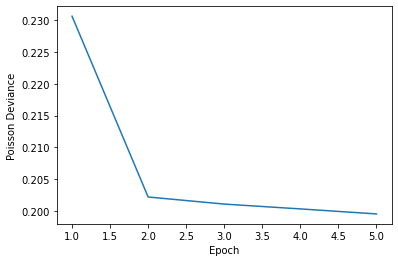

In [44]:
#loss function
import matplotlib.pyplot as plt
plt.plot(range(1, 6), hist.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Poisson Deviance");

5297/5297 [==============================] - 2s 396us/step


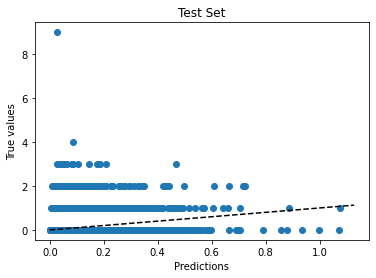

In [45]:
#function used to add diagonal lines to plots
def add_diagonal_line():
    xl = plt.xlim()
    yl = plt.ylim()
    shortestSide = min(xl[1], yl[1])
    plt.plot([0, shortestSide], [0, shortestSide], color="black", linestyle="--")

#plot predictions for test set
y_pred = model.predict(X_test_sc)
plt.scatter(y_pred, y_test)
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.title("Test Set")
add_diagonal_line()

In [46]:
#model assessment
from sklearn.metrics import mean_poisson_deviance
poissonTrain = {"Model 1": mean_poisson_deviance(y_train, model.predict(X_train_sc))}
poissonTest = {"Model 1": mean_poisson_deviance(y_test, model.predict(X_test_sc))}

5297/5297 [==============================] - 2s 407us/step


Model 2: 1 hidden layer, 60 neurons, ReLu activation for hidden layer, 5 epochs

In [47]:
#set seed to control randomness since model is initialised randomly
set_seed(123) 

#create model
model = Sequential([
    #hidden layer with 60 neurons
    Dense(60, input_dim=NUM_FEATURES, activation="relu"),
    
    #output layer
    Dense(1, activation="exponential")
])

In [48]:
#compile and fit the model
model.compile("adam", "Poisson")
%time hist = model.fit(X_train_sc, y_train, epochs=5, verbose=False)
hist.history["loss"]

CPU times: total: 1min 3s
Wall time: 40 s


[0.2096957564353943,
 0.2017134577035904,
 0.20053043961524963,
 0.1997501403093338,
 0.19905374944210052]

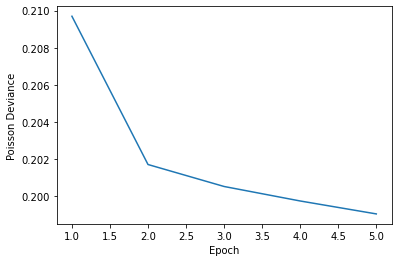

In [49]:
#loss function
plt.plot(range(1, 6), hist.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Poisson Deviance");

5297/5297 [==============================] - 2s 424us/step


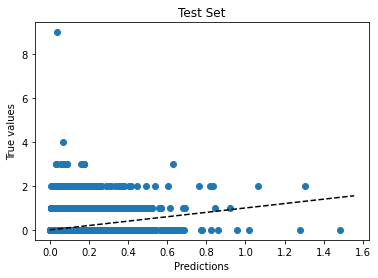

In [50]:
#plot predictions for test set
y_pred = model.predict(X_test_sc)
plt.scatter(y_pred, y_test)
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.title("Test Set")
add_diagonal_line()

In [51]:
poissonTrain["Model 2"] = mean_poisson_deviance(y_train, model.predict(X_train_sc))
poissonTest["Model 2"] = mean_poisson_deviance(y_test, model.predict(X_test_sc))

5297/5297 [==============================] - 2s 427us/step


Model 3: 2 hidden layers, 30 neurons each, ReLu activation for hidden layer, 5 epochs

In [52]:
#set seed to control randomness since model is initialised randomly
set_seed(123) 

#create model
model = Sequential([
    #hidden layer with 30 neurons
    Dense(30, input_dim=NUM_FEATURES, activation="relu"),

    #hidden layer with 30 neurons
    Dense(30, input_dim=NUM_FEATURES, activation="relu"),

    #output layer
    Dense(1, activation="exponential")
])

In [53]:
#compile and fit the model
model.compile("adam", "Poisson")
%time hist = model.fit(X_train_sc, y_train, epochs=5, verbose=False)
hist.history["loss"]

CPU times: total: 1min 3s
Wall time: 41.3 s


[0.20610710978507996,
 0.20176242291927338,
 0.2006738781929016,
 0.1999634951353073,
 0.1991780549287796]

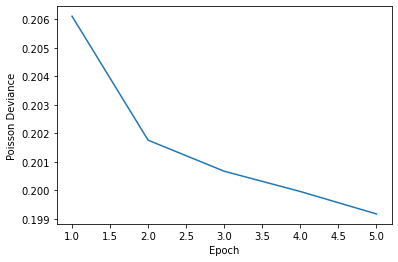

In [54]:
#loss function
plt.plot(range(1, 6), hist.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Poisson Deviance");

5297/5297 [==============================] - 2s 404us/step


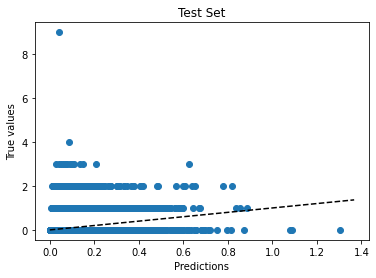

In [55]:
#plot predictions for test set
y_pred = model.predict(X_test_sc)
plt.scatter(y_pred, y_test)
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.title("Test Set")
add_diagonal_line()

In [56]:
poissonTrain["Model 3"] = mean_poisson_deviance(y_train, model.predict(X_train_sc))
poissonTest["Model 3"] = mean_poisson_deviance(y_test, model.predict(X_test_sc))

5297/5297 [==============================] - 2s 410us/step


Model 4: 1 hidden layers, 30 neurons each, ReLu activation for hidden layer, 100 epochs

In [57]:
#set seed to control randomness since model is initialised randomly
set_seed(123) 

#create model
model = Sequential([
    #hidden layer with 30 neurons
    Dense(30, input_dim=NUM_FEATURES, activation="relu"),

    #output layer
    Dense(1, activation="exponential")
])

In [59]:
#compile and fit the model
model.compile("adam", "Poisson")
%time hist = model.fit(X_train_sc, y_train, epochs=20, verbose=False)
hist.history["loss"]

CPU times: total: 4min 14s
Wall time: 2min 38s


[0.19669419527053833,
 0.19656547904014587,
 0.19656243920326233,
 0.19660323858261108,
 0.1965377926826477,
 0.19652697443962097,
 0.19656653702259064,
 0.19655205309391022,
 0.19649964570999146,
 0.196479931473732,
 0.19652415812015533,
 0.19646413624286652,
 0.19649824500083923,
 0.19644124805927277,
 0.1964680701494217,
 0.19645804166793823,
 0.1964067965745926,
 0.1964159905910492,
 0.19638939201831818,
 0.19634640216827393]

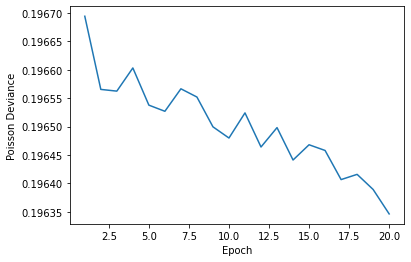

In [61]:
#loss function
plt.plot(range(1, 21), hist.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Poisson Deviance");

5297/5297 [==============================] - 2s 410us/step


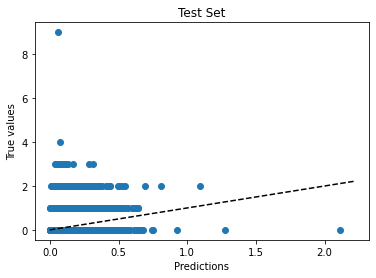

In [62]:
#plot predictions for test set
y_pred = model.predict(X_test_sc)
plt.scatter(y_pred, y_test)
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.title("Test Set")
add_diagonal_line()

In [63]:
poissonTrain["Model 4"] = mean_poisson_deviance(y_train, model.predict(X_train_sc))
poissonTest["Model 4"] = mean_poisson_deviance(y_test, model.predict(X_test_sc))

5297/5297 [==============================] - 2s 420us/step


Model 5: 2 hidden layers, 60 neurons, ReLu activation for hidden layer, 20 epochs

In [71]:
#set seed to control randomness since model is initialised randomly
set_seed(123) 

#create model
model = Sequential([
    #hidden layer with 30 neurons
    Dense(60, input_dim=NUM_FEATURES, activation="relu"),

    #hidden layer with 30 neurons
    Dense(60, input_dim=NUM_FEATURES, activation="relu"),

    #output layer
    Dense(1, activation="exponential")
])

In [72]:
#compile and fit the model
model.compile("adam", "Poisson")
%time hist = model.fit(X_train_sc, y_train, epochs=20, verbose=False)
hist.history["loss"]

CPU times: total: 4min 57s
Wall time: 2min 51s


[0.20436786115169525,
 0.20137713849544525,
 0.19997923076152802,
 0.1990777999162674,
 0.198269322514534,
 0.19767926633358002,
 0.19742904603481293,
 0.19704528152942657,
 0.19677254557609558,
 0.1966230720281601,
 0.19644060730934143,
 0.19625164568424225,
 0.19620759785175323,
 0.19600939750671387,
 0.19577525556087494,
 0.19564682245254517,
 0.19542813301086426,
 0.1954035460948944,
 0.19530873000621796,
 0.1950247436761856]

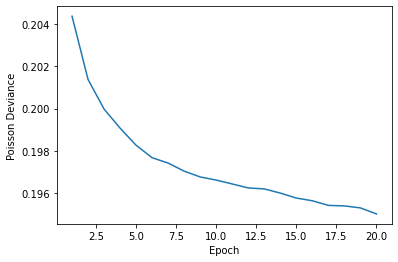

In [73]:
#loss function
plt.plot(range(1, 21), hist.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Poisson Deviance");

5297/5297 [==============================] - 2s 427us/step


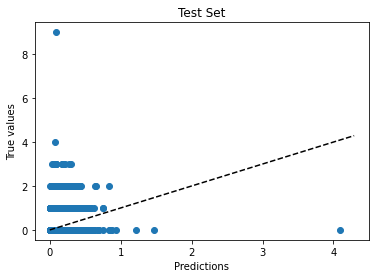

In [74]:
#plot predictions for test set
y_pred = model.predict(X_test_sc)
plt.scatter(y_pred, y_test)
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.title("Test Set")
add_diagonal_line()

In [75]:
poissonTrain["Model 5"] = mean_poisson_deviance(y_train, model.predict(X_train_sc))
poissonTest["Model 5"] = mean_poisson_deviance(y_test, model.predict(X_test_sc))

5297/5297 [==============================] - 2s 429us/step


Model Comparison

In [76]:
trainResults = pd.DataFrame({
    "Model": poissonTrain.keys(), "Poisson Deviance": poissonTrain.values()
})
trainResults.sort_values("Poisson Deviance", ascending=True)

,Model,Poisson Deviance
4,Model 5,0.291382
3,Model 4,0.295101
1,Model 2,0.298660
2,Model 3,0.298721
0,Model 1,0.299787


In [77]:
trainResults = pd.DataFrame({
    "Model": poissonTest.keys(), "Poisson Deviance": poissonTest.values()
})
trainResults.sort_values("Poisson Deviance", ascending=True)

,Model,Poisson Deviance
3,Model 4,0.299174
4,Model 5,0.300725
2,Model 3,0.302131
1,Model 2,0.302457
0,Model 1,0.302963
